In [ ]:
!pip install dimod
!pip install 'qiskit[all]'
!pip install dwave-neal

     |████████████████████████████████| 13.1 MB 64 kB/s 
     |████████████████████████████████| 782 kB 76.7 MB/s 
     |████████████████████████████████| 6.1 MB 5.0 MB/s 
     |████████████████████████████████| 17.9 MB 67 kB/s 
     |████████████████████████████████| 236 kB 71.2 MB/s 
     |████████████████████████████████| 207 kB 66.5 MB/s 
     |████████████████████████████████| 2.1 MB 49.8 MB/s 
     |████████████████████████████████| 144 kB 70.7 MB/s 
     |████████████████████████████████| 48 kB 5.6 MB/s 
     |████████████████████████████████| 96 kB 5.7 MB/s 
     |████████████████████████████████| 2.8 MB 12.5 MB/s 
     |████████████████████████████████| 210 kB 57.4 MB/s 
     |████████████████████████████████| 162 kB 76.1 MB/s 
     |████████████████████████████████| 634 kB 53.2 MB/s 
     |████████████████████████████████| 1.4 MB 42.2 MB/s 
     |████████████████████████████████| 52 kB 1.4 MB/s 
     |████████████████████████████████| 943 kB 56.7 MB/s 
     |█████████████████

     |████████████████████████████████| 397 kB 5.1 MB/s 


In [ ]:
!pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 97 kB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotlib-3.4.3:
      Successfully uninstalled matplotlib-3.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
qiskit-experiments 0.1.0 requires matplotlib>=3.3, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!pip install plotly

In [ ]:
!pip install gsgmorph

     |████████████████████████████████| 887 kB 7.5 MB/s 


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from time import time
from pprint import pprint
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import clear_output

In [ ]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from dimod import BinaryQuadraticModel, AdjVectorBQM
from qiskit.optimization import QuadraticProgram
from qiskit.optimization.converters import LinearEqualityToPenalty, InequalityToEquality, IntegerToBinary
import neal

/usr/local/lib/python3.7/dist-packages/qiskit/aqua/__init__.py:86: DeprecationWarning:

The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>

/usr/local/lib/python3.7/dist-packages/qiskit/optimization/__init__.py:92: DeprecationWarning:

The package qiskit.optimization is deprecated. It was moved/refactored to qiskit_optimization (pip install qiskit-optimization). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>



In [ ]:
from qiskit.aqua.algorithms import QAOA
from qiskit.optimization.algorithms import MinimumEigenOptimizer
from qiskit import Aer
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_city
from qiskit.aqua.components.optimizers import COBYLA, SLSQP, ADAM, L_BFGS_B
from qiskit.optimization import QuadraticProgram
from docplex.mp.model import Model

from qiskit.optimization.applications.ising import stable_set
from qiskit import Aer
from qiskit.optimization.applications.ising import stable_set
from qiskit.aqua.algorithms import VQE, NumPyMinimumEigensolver, QAOA, NumPyEigensolver
from qiskit.aqua import aqua_globals
from qiskit.aqua import QuantumInstance
from qiskit.optimization.applications.ising.common import sample_most_likely
from qiskit.optimization.algorithms import MinimumEigenOptimizer
from qiskit.optimization.problems import QuadraticProgram

In [ ]:
import gsgmorph.matrix_form as gsgm_mf
import networkx as nx

graph_to_embed = nx.Graph([(1,2),(2,3),(3,4),(1,4)])
target_graph = nx.Graph([('a','b'),('b','c'),('b', 'd'), ('a', 'd')])

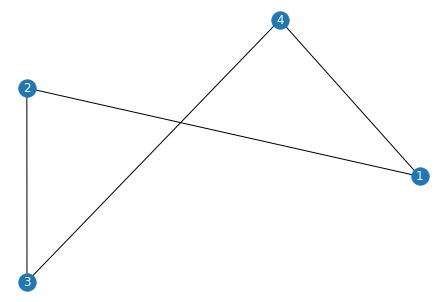

In [ ]:
# Get fixed position
pos = nx.spring_layout(graph_to_embed, seed=9999)

# Graph to be embedded onto a target graph
nx.draw(graph_to_embed, pos, with_labels=True, font_color='w')

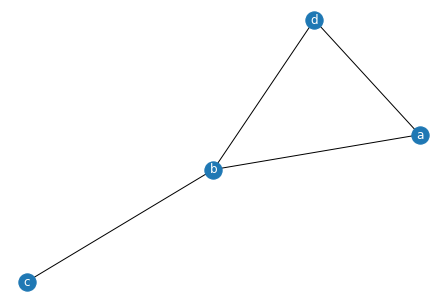

In [ ]:

# Get fixed position
pos = nx.spring_layout(target_graph, seed=9999)

# Target graph, the above graph will be mapped to this one
nx.draw(target_graph, pos, with_labels=True, font_color='w')

In [ ]:

# Obtain the QUBO and the sample translation dictionary
Q, sample_translation_dict = gsgm_mf.graph_isomorphism(graph_to_embed, target_graph)

In [ ]:
# Put the QUBO on the annealer and obtain the lowest energy solution.
# NOTE: It is possible to have multiple acceptable solutions!
import neal
sampler = neal.SimulatedAnnealingSampler()
sampleset = sampler.sample_qubo(Q, num_reads=100)
sampleset = sampleset.aggregate()
best_sample = sampleset.first

In [ ]:
sampleset

SampleSet(rec.array([([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0], -7.,  6),
           ([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0], -7.,  9),
           ([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0], -7.,  6),
           ([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0], -7.,  6),
           ([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0], -7.,  7),
           ([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0], -7.,  5),
           ([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1], -7.,  8),
           ([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0], -7.,  3),
           ([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0], -7.,  6),
           ([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1], -7.,  4),
           ([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0], -7., 10),
           ([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1], -7.,  9),
           ([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], -7.,  5),
           ([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [ ]:

# We can use an annealing sample and the sample translation dictionary from before to
# generate a dictionary that maps nodes from the graph to be embedded to the target graph
mapping = gsgm_mf.translate_sample(best_sample, sample_translation_dict)

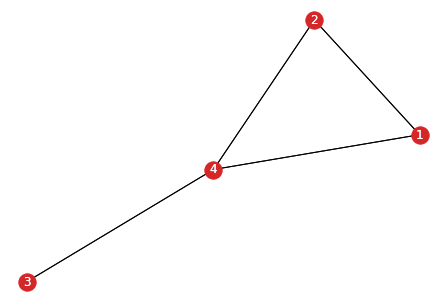

In [ ]:
# We can use NetworkX to help us visualize the subgraph and how it maps to the target graph

# Invert the mapping so it is from the target graph TO the graph to embed nodes
# Snippet taken from: 
# https://stackoverflow.com/a/483833
inv_mapping = {v: k for k, v in mapping.items()}

# relabel the nodes in the target graph with the node labels from the graph to embed
updated_nodes = nx.relabel_nodes(target_graph, inv_mapping, copy=True)
# Get the same fixed position used before
pos = nx.spring_layout(updated_nodes, seed=9999)

# Highlight the nodes that have been relabeled
nx.draw(updated_nodes, pos, with_labels=True, 
        font_color='w', 
        nodelist=[key for key in mapping.keys()], 
        node_color="tab:red")

# Difference between two lists:
# https://stackoverflow.com/a/3462160
nx.draw(updated_nodes, 
        pos, 
        with_labels=True, 
        font_color='w', 
        nodelist=list(set(updated_nodes.nodes()) - set(mapping.keys())), 
        node_color="tab:blue")

In [ ]:
import numpy as np

def build_matrix(data):
    data = dict(data)

    maxX = max([x for (x, y) in list(data.keys())])
    maxY = max([y for (x, y) in list(data.keys())])

    maxX = max([maxX, maxY])
    maxY = max([maxX, maxY])

    mat = np.zeros(shape=(maxX+1, maxY+1))

    for key, value in data.items():
        x, y = key
        mat[x][y] = value

    return mat

Q_mat = build_matrix(Q)
Q

defaultdict(int,
            {(0, 0): -2,
             (0, 1): 2,
             (0, 2): 2,
             (0, 3): 2,
             (0, 4): 3,
             (0, 6): 1,
             (0, 8): 2,
             (0, 12): 3,
             (0, 14): 1,
             (1, 1): -2,
             (1, 2): 2,
             (1, 3): 2,
             (1, 5): 3,
             (1, 9): 2,
             (1, 13): 3,
             (2, 2): -2,
             (2, 3): 2,
             (2, 4): 1,
             (2, 6): 3,
             (2, 7): 1,
             (2, 10): 2,
             (2, 12): 1,
             (2, 14): 3,
             (2, 15): 1,
             (3, 3): -2,
             (3, 6): 1,
             (3, 7): 3,
             (3, 11): 2,
             (3, 14): 1,
             (3, 15): 3,
             (4, 4): -2,
             (4, 5): 2,
             (4, 6): 2,
             (4, 7): 2,
             (4, 8): 3,
             (4, 10): 1,
             (4, 12): 2,
             (5, 5): -2,
             (5, 6): 2,
             (5, 7): 2,
     

In [ ]:
s = neal.SimulatedAnnealingSampler()
sampleset = s.sample_qubo(Q, beta_range=(5, 100), num_sweeps=20000, num_reads=100,
                        beta_schedule_type='geometric')

In [ ]:

# Post processing

# Offset is empirically calculated as of now. 
# From preliminary experiments, the offset is 
# calculated to be 2 * number of nodes of the 
# graph

offset = 2.0 * len(graph_to_embed.nodes)

energies = []
final_energies = []
for datum in sampleset.data(fields=["sample", "energy"]):
    energies.append(datum.energy)

print(offset)
for energy in energies: 
  final_energy = float(energy) + float(offset)
  final_energies.append(final_energy)

8.0


In [ ]:
final_energies[0]

1.0

NodeView((0, 1, 2, 3))

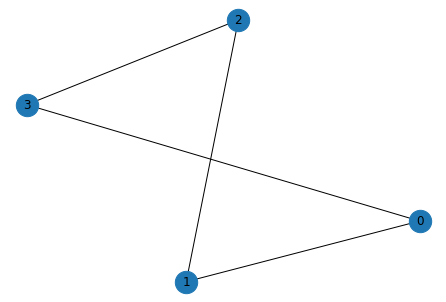

In [ ]:
G1 = nx.Graph([(0,1), (1,2), (2,3), (0,3)])
# G1 = nx.Graph()
# G1_edges_list = [(1,2), (2,3)]
# G1.add_node(0)
# G1_nodes_list = [0,1,2,3]
# G1.add_edges_from(G1_edges_list)
# G1.add_nodes_from(G1_nodes_list)
nx.draw(G1, with_labels=True, alpha=1, node_size=500)
G1.nodes

False

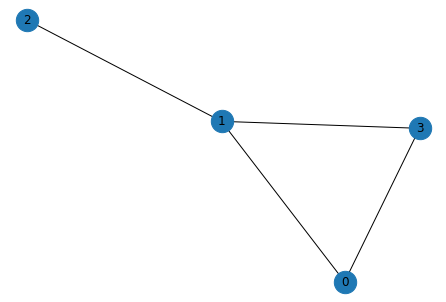

In [ ]:
G2 = nx.Graph([(0,1), (1,2), (1,3), (0,3)])
# G2 = nx.Graph()
# G2_edges_list = [(0,3), (3,1)]
# G2.add_node(2)
# G2_nodes_list = [0,1,2,3]
# G2.add_edges_from(G2_edges_list)
# G2.add_nodes_from(G2_nodes_list)
nx.draw(G2, with_labels=True, alpha=1, node_size=500)
G2.nodes
nx.is_isomorphic(G1,G2)

In [ ]:
def add_variables(qp, G1, G2):
    for u in range(G1.number_of_nodes()):
        for i in range(G2.number_of_nodes()):
            qp.binary_var(f"x_{u}_{i}")


def one_node_connectG1(qp, G1, G2):
    
    num_nodes = G1.number_of_nodes()
    
    for u in range(num_nodes):
        L = {}
        for i in range(num_nodes):
            L[f"x_{u}_{i}"] = 1
    
        qp.linear_constraint(linear = L, sense='E', rhs=1)


def one_node_connectG2(qp, G1, G2):
    
    num_nodes = G1.number_of_nodes()
    
    for i in range(num_nodes):
        L = {}
        for u in range(num_nodes):
            
            L[f"x_{u}_{i}"] = 1
    
        qp.linear_constraint(linear = L, sense='E', rhs=1)


def get_objective(qp):
    qdict = {}
    for key, item in qp.variables_index.items():
        qdict[item] = key

    qp.objective.quadratic.to_dict()
    Q_int = qp.objective.quadratic.to_dict()
    L_int = qp.objective.linear.to_dict()
    
    Q = defaultdict(lambda: 0) 
    for k, v in Q_int.items():
        k1 = k[0]
        k2 = k[1]
        Q[(qdict[k1], qdict[k2])] = v
    
    L = defaultdict(lambda: 0)
    for k, v in L_int.items():
        L[qdict[k]] = v

    C = qp.objective.constant
    return Q, L, C


def not_in_edges1(qp, G1, G2, C2):
    
    num_nodes = list(range(G2.number_of_nodes()))
    
    Q, L, C = get_objective(qp)

    for i,j in itertools.permutations(num_nodes, 2): #original
#     for i,j in itertools.permutations(list(range(G2.number_of_nodes())), 2):
        
        if (i,j) not in G1.edges and i != j:
            
            for u,v in itertools.permutations(num_nodes, 2): #original
            # for u,v in itertools.combinations(G2.nodes, 2):
                if (u,v) in G2.edges:
#                     print(i,j,u,v)
                    Q[(f"x_{u}_{i}", f"x_{v}_{j}")] = C2
    
    qp.minimize(quadratic = Q, linear = L, constant = C)


def not_in_edges2(qp, G1, G2, C2):
    
    num_nodes = list(range(G2.number_of_nodes()))
    Q, L, C = get_objective(qp)
    print('L')
    print(L)
    for i,j in itertools.permutations(num_nodes, 2): #original
        
        if (i,j) in G1.edges:
            
            for u,v in itertools.permutations(num_nodes, 2): #original
            # for u,v in itertools.combinations(G2.nodes, 2):
                
                if (u,v) not in G2.edges and u != v:
#                     print(i,j,u,v)
                    Q[(f"x_{u}_{i}", f"x_{v}_{j}")] = C2
    
    qp.minimize(quadratic = Q, linear = L, constant = C)

In [ ]:
import dimod
from dimod import BinaryQuadraticModel, AdjVectorBQM

qp = QuadraticProgram()
ineq2eq = InequalityToEquality()
int2bin = IntegerToBinary()

C1 = 1
C2 = 1

# print('Ration of: ', C2/C1)

add_variables(qp, G1, G2)

one_node_connectG1(qp, G1, G2)
lineq2penalty = LinearEqualityToPenalty(penalty=C1)
qp = lineq2penalty.convert(int2bin.convert(ineq2eq.convert(qp)))

In [ ]:
from qiskit.optimization.converters import QuadraticProgramToQubo

one_node_connectG2(qp, G1, G2)
lineq2penalty = LinearEqualityToPenalty(penalty=C1)
qp = lineq2penalty.convert(int2bin.convert(ineq2eq.convert(qp)))
                           
not_in_edges1(qp, G1, G2, C2)
not_in_edges2(qp, G1, G2, C2)

conv = QuadraticProgramToQubo()
prob = conv.convert(qp)
Hamiltonian, offset  = prob.to_ising()
variables = prob.variables_index
# true_result = NumPyEigensolver(operator = Hamiltonian).run().eigenvalues

L
defaultdict(<function get_objective.<locals>.<lambda> at 0x7f379b176950>, {'x_0_0': -6.0, 'x_0_1': -6.0, 'x_0_2': -6.0, 'x_0_3': -6.0, 'x_1_0': -6.0, 'x_1_1': -6.0, 'x_1_2': -6.0, 'x_1_3': -6.0, 'x_2_0': -6.0, 'x_2_1': -6.0, 'x_2_2': -6.0, 'x_2_3': -6.0, 'x_3_0': -6.0, 'x_3_1': -6.0, 'x_3_2': -6.0, 'x_3_3': -6.0})


In [ ]:
print(prob)

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: CPLEX

Minimize
 obj: - 6 x_0_0 - 6 x_0_1 - 6 x_0_2 - 6 x_0_3 - 6 x_1_0 - 6 x_1_1 - 6 x_1_2
      - 6 x_1_3 - 6 x_2_0 - 6 x_2_1 - 6 x_2_2 - 6 x_2_3 - 6 x_3_0 - 6 x_3_1
      - 6 x_3_2 - 6 x_3_3 + [ 6 x_0_0^2 + 4 x_0_0*x_0_1 + 4 x_0_0*x_0_2
      + 4 x_0_0*x_0_3 + 8 x_0_0*x_1_0 + 4 x_0_0*x_1_2 + 8 x_0_0*x_2_0
      + 4 x_0_0*x_2_1 + 4 x_0_0*x_2_3 + 8 x_0_0*x_3_0 + 4 x_0_0*x_3_2
      + 6 x_0_1^2 + 4 x_0_1*x_0_2 + 4 x_0_1*x_0_3 + 8 x_0_1*x_1_1
      + 4 x_0_1*x_1_3 + 4 x_0_1*x_2_0 + 8 x_0_1*x_2_1 + 4 x_0_1*x_2_2
      + 8 x_0_1*x_3_1 + 4 x_0_1*x_3_3 + 6 x_0_2^2 + 4 x_0_2*x_0_3
      + 4 x_0_2*x_1_0 + 8 x_0_2*x_1_2 + 4 x_0_2*x_2_1 + 8 x_0_2*x_2_2
      + 4 x_0_2*x_2_3 + 4 x_0_2*x_3_0 + 8 x_0_2*x_3_2 + 6 x_0_3^2
      + 4 x_0_3*x_1_1 + 8 x_0_3*x_1_3 + 4 x_0_3*x_2_0 + 4 x_0_3*x_2_2
      + 8 x_0_3*x_2_3 + 4 x_0_3*x_3_1 + 8 x_0_3*x_3_3 + 6 x_1_0^2
      + 4 x_1_0*x_1_1 + 4 x_1_0*x_1_2 + 4 x_1_0*x_1_3 + 8 x_1_0*x_2

In [ ]:
min_val = NumPyMinimumEigensolver(Hamiltonian)

In [ ]:
min_val

In [ ]:
offset

40.0

In [ ]:
min_val.compute_minimum_eigenvalue()

{'eigenvalue': (-38+0j), 'eigenstate': VectorStateFn(Statevector([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2)), coeff=1.0, is_measurement=False)}

In [ ]:
# Hamiltonian_matrix = qp.to_qubo()

In [ ]:
# import scipy.linalg as la

# min(la.eig(Hamiltonian_matrix)[0])

In [ ]:
# optmizer = MinimumEigenOptimizer(maxiter = 5000)
# seed = 10598
# backend = Aer.get_backend('qasm_simulator')
# p = 15
# initial_angle = np.random.random(2*p)
# quantum_instance = QuantumInstance(backend, seed_simulator=seed, seed_transpiler=seed)
# qaoa_solve = QAOA(Hamiltonian, optimizer = optmizer, p = p, quantum_instance  = quantum_instance, initial_point=initial_angle)

In [ ]:
# qaoa_solve.cleanup_parameterized_circuits
# initial_angle = np.random.random(2)
# x = qaoa_solve.construct_circuit(initial_angle)

In [ ]:
# q = qaoa_solve.run()

In [ ]:
# optimal_val_list = []
# for _ in range(15):
#   qaoa_solve = QAOA(Hamiltonian, optimizer = optmizer, p = p, quantum_instance  = quantum_instance, initial_point=initial_angle)
#   q = qaoa_solve.run()
#   optimal_val_list.append(q['optimal_value'])

In [ ]:


# # Python program to get average of a list
# def Average(lst):
#     return sum(lst) / len(lst)

# average = Average(optimal_val_list)

In [ ]:
# average

In [ ]:
aqua_globals.random_seed = np.random.default_rng(123)
seed = 10598
backend = Aer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, seed_simulator=seed, seed_transpiler=seed)

qaoa = QAOA(quantum_instance=quantum_instance, p = 1)

# create minimum eigen optimizer based on qaoa
qaoa_optimizer = MinimumEigenOptimizer(qaoa)

# solve quadratic program
result = qaoa_optimizer.solve(qp)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

The variable qiskit.aqua.aqua_globals is deprecated. It was moved/refactored to qiskit.utils.algorithm_globals (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>

/usr/local/lib/python3.7/dist-packages/qiskit/aqua/quantum_instance.py:137: DeprecationWarning:

The class qiskit.aqua.QuantumInstance is deprecated. It was moved/refactored to qiskit.utils.QuantumInstance (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>

/usr/local/lib/python3.7/dist-packages/qiskit/aqua/components/optimizers/optimizer.py:50: DeprecationWarning:

The package qiskit.aqua.components.optimizers is deprecated. It was moved/refactored to qiskit.algorithms.optimizers (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.m

In [ ]:
print(result)

optimal function value: 0.0
optimal value: [0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.]
status: SUCCESS


In [ ]:
offset

32.0

In [ ]:
import networkx as nx
import warnings
from itertools import product
from collections import defaultdict


def graph_isomorphism(graph_to_embed, target_graph):
    """Graph Isomorphism QUBO generator. Given a graph to embed
    (graph_to_embed) onto a target graph (target_graph), a QUBO
    is returned along with a dictionary that allows for translation from
    the QUBO variables to the potential node mapping combinations.
    Args:
        graph_to_embed (networkx.classes.graph.Graph):
            An undirected graph to be mapped to another graph.
        target_graph (networkx.classes.graph.Graph):
            An undirected graph that the graph_to_embed (see above)
            is to be mapped onto.
    Raises:
        IncompatibleGraphError:
            A graph isomorphism can only exist if the number of nodes
            and the number of edges in the graph are identical. If
            graphs are given that fail to satisfy this criteria the
            exception is raised and the QUBO is not generated.
    Returns:
        (defaultdict(int), { int: (networkx
        node (any hashable object), networkx node) }:
            A tuple containing a QUBO represented by a defaultdict with
            `int()` as the `default_factory` attribute and a dictionary
            for translating from the indices used in the QUBO to the
            potential node mappings (represented as tuples).
            The dictionary should be passed to `translate_sample()` to
            generate the proper node-to-node mapping.
    """

    # Ensure that the requirements
    # |V1| = |V2| (graphs must have the same number of nodes/vertices)
    # and |E1| = |E2| (graphs must have the same number of edges)
    # holds
#     if (graph_to_embed.number_of_nodes()
#             != target_graph.number_of_nodes()):
#         raise IncompatibleGraphError("The number of vertices "
#                                      "do not match!")

#     if (graph_to_embed.number_of_edges()
#             != target_graph.number_of_edges()):
#         raise IncompatibleGraphError("The number of edges "
#                                      "do not match!")

    # get the "n" used for indexing
    num_nodes = graph_to_embed.number_of_nodes()

    # target_graph_dict and graph_to_embed dict are used to
    # translate between the integer indices found in Calude et al.'s
    # paper and any hashable type used in the NetworkX graph.
    target_graph_dict = {i: node for i, node
                         in enumerate(target_graph.nodes())}
    graph_to_embed_dict = {node: i for i, node
                           in enumerate(graph_to_embed.nodes())}

    # Allow for samples to be translated
    # back to prospective node mappings (must be fed by user to
    # `translate_sample()` along with sample from `dimod.SampleSet`)
    sample_translation_dict = {i: v for i, v in
                               enumerate(product(graph_to_embed.nodes(),
                                                 target_graph.nodes()))}

    # translate summation indices to individual QUBO indices
    # `product` usage inspired by: https://arxiv.org/pdf/2009.00140.pdf
    # code repository: https://github.com/bdury/QUBO-for-Qubit-Allocation
    td = {v: k for k, v in enumerate(product(range(num_nodes),
                                             range(num_nodes)))}

    # initialize empty QUBO
    Q = defaultdict(int)
    print('i,j')
    # Ensure mapping function is bijective
    for i in range(num_nodes):
        for i_p in range(num_nodes):
            Q[td[i, i_p], td[i, i_p]] += -2
            for j, j_p in zip(range(num_nodes), range(num_nodes)):
                if j != i:
                    print(i,j)
                    if td[i, i_p] <= td[j, i_p]:
                        
                        Q[td[i, i_p], td[j, i_p]] += 1
                    else:
                        Q[td[j, i_p], td[i, i_p]] += 1
                if j_p != i_p:
                    if td[i, i_p] <= td[i, j_p]:
                        Q[td[i, i_p], td[i, j_p]] += 1
                    else:
                        Q[td[i, j_p], td[i, i_p]] += 1

    # Ensure edge invariance
    for edge in graph_to_embed.edges():
        i, j = graph_to_embed_dict[edge[0]], graph_to_embed_dict[edge[1]]
        for i_p in range(num_nodes):
            for j_p in range(num_nodes):
                if not target_graph.has_edge(target_graph_dict[i_p],
                                             target_graph_dict[j_p]):
                    if td[i, i_p] <= td[j, j_p]:
                        Q[td[i, i_p], td[j, j_p]] += 1
                    else:
                        Q[td[j, j_p], td[i, i_p]] += 1

    return Q, sample_translation_dict

In [ ]:
graph_to_embed = G1
target_graph = G2

graph_isomorphism(graph_to_embed, target_graph)

i,j
0 1
0 2
0 3
0 1
0 2
0 3
0 1
0 2
0 3
0 1
0 2
0 3
1 0
1 2
1 3
1 0
1 2
1 3
1 0
1 2
1 3
1 0
1 2
1 3
2 0
2 1
2 3
2 0
2 1
2 3
2 0
2 1
2 3
2 0
2 1
2 3
3 0
3 1
3 2
3 0
3 1
3 2
3 0
3 1
3 2
3 0
3 1
3 2


(defaultdict(int,
             {(0, 0): -2,
              (0, 1): 2,
              (0, 2): 2,
              (0, 3): 2,
              (0, 4): 3,
              (0, 6): 1,
              (0, 8): 2,
              (0, 12): 3,
              (0, 14): 1,
              (1, 1): -2,
              (1, 2): 2,
              (1, 3): 2,
              (1, 5): 3,
              (1, 7): 1,
              (1, 9): 2,
              (1, 13): 3,
              (1, 15): 1,
              (2, 2): -2,
              (2, 3): 2,
              (2, 4): 1,
              (2, 6): 3,
              (2, 10): 2,
              (2, 12): 1,
              (2, 14): 3,
              (3, 3): -2,
              (3, 5): 1,
              (3, 7): 3,
              (3, 11): 2,
              (3, 13): 1,
              (3, 15): 3,
              (4, 4): -2,
              (4, 5): 2,
              (4, 6): 2,
              (4, 7): 2,
              (4, 8): 3,
              (4, 10): 1,
              (4, 12): 2,
              (5, 5): -2,
              